In [1]:
import torch
import torch.nn as nn
from spiral_neuralnet import *
import spiral_neuralnet as spiral

In [2]:
%run spiral_neuralnet.py --interactive --description=dend_temp_contrast_fixed_bias

  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
dend_temp_contrast_net = net

In [4]:
delta_w_dend_temp_contrast = net.weights['Out'].data - net.initial_weights['Out'].data
print(delta_w_dend_temp_contrast)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.4325e-05,  0.0000e+00,  0.0000e+00,
         -2.1766e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.1518e-04,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -1.9748e-05, -1.3527e-05,
         -4.8126e-05,  0.0000e+00, -2.4767e-05, -7.2647e-06,  0.0000e+00,
          0.0000e+00, -1.0817e-04,  0.0000e+00, -2.4502e-05,  0.0000e+00,
          0.0000e+00, -7.2568e-05,  0.0000e+00,  0.0000e+00, -1.5736e-05,
         -5.9469e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.33

In [5]:
%run spiral_neuralnet.py --interactive --description=backprop_fixed_bias

  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
bp_net = net

In [7]:
delta_w_bp = bp_net.weights['Out'].data - bp_net.initial_weights['Out'].data
print(delta_w_bp)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.4325e-05,  0.0000e+00,  0.0000e+00,
         -2.1766e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.1518e-04,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -1.9748e-05, -1.3527e-05,
         -4.8126e-05,  0.0000e+00, -2.4767e-05, -7.2647e-06,  0.0000e+00,
          0.0000e+00, -1.0817e-04,  0.0000e+00, -2.4502e-05,  0.0000e+00,
          0.0000e+00, -7.2568e-05,  0.0000e+00,  0.0000e+00, -1.5736e-05,
         -5.9469e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.33

In [8]:
bp_net.forward_activity['H1'].shape

torch.Size([1, 128])

In [9]:
torch.all(delta_w_bp == 0)

tensor(False)

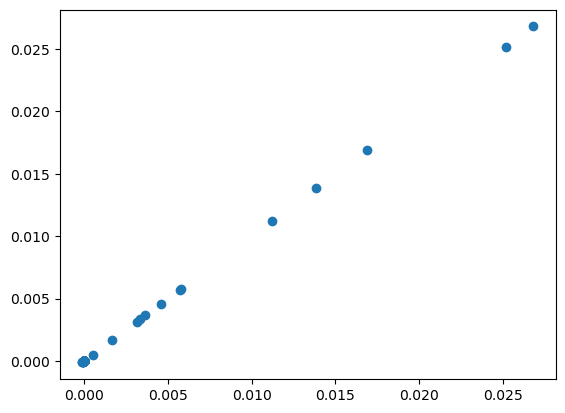

In [10]:
plt.figure()
plt.scatter(delta_w_bp.flatten(), delta_w_dend_temp_contrast.flatten())

In [11]:
torch.all(delta_w_bp.flatten() == delta_w_dend_temp_contrast.flatten())

tensor(True)

In [12]:
torch.all(dend_temp_contrast_net.forward_activity['Out'] == bp_net.forward_activity['Out'])

tensor(True)

In [13]:
torch.all(dend_temp_contrast_net.initial_weights['Out'].data == bp_net.initial_weights['Out'].data)

tensor(True)

In [14]:
dend_temp_contrast_net.nudges['Out'].shape

torch.Size([1, 4])

In [15]:
local_loss = dend_temp_contrast_net.nudges['Out'] * dend_temp_contrast_net.ReLU_derivative(dend_temp_contrast_net.forward_soma_state['Out'])

In [16]:
x = dend_temp_contrast_net.forward_soma_state['Out']
output = torch.ones_like(x)
indexes = torch.where(x <= 0)
output[indexes] = 0
print(output)

tensor([[0., 1., 1., 0.]])


In [17]:
print(local_loss)
print(dend_temp_contrast_net.forward_activity['Out'])
print(dend_temp_contrast_net.forward_soma_state['Out'])
print(dend_temp_contrast_net.nudges['Out'])

tensor([[ 0.0000, -0.0020,  0.4733,  0.0000]])
tensor([[0.0000, 0.0041, 0.0533, 0.0000]])
tensor([[-0.2336,  0.0041,  0.0533, -0.0683]])
tensor([[ 0.0000, -0.0020,  0.4733,  0.0000]])


tensor(False)

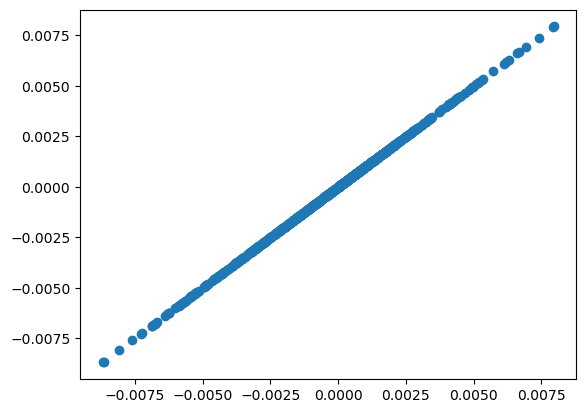

In [18]:
plt.figure()
layer = 'H2'
dw_dend_tc_H1 = dend_temp_contrast_net.weights[layer].data - dend_temp_contrast_net.initial_weights[layer].data
dw_bp_H1 = bp_net.weights[layer].data - bp_net.initial_weights[layer].data
plt.scatter(dw_bp_H1.flatten(), dw_dend_tc_H1.flatten())
torch.all(dw_dend_tc_H1 == dw_bp_H1)

In [19]:
dw_bp_H1 == dw_dend_tc_H1

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [20]:
dend_temp_contrast_net.backward_activity['H1']

tensor([[0.0000, 0.4050, 0.0585, 0.2244, 0.0070, 0.5474, 0.0558, 0.0000, 0.5686,
         0.0000, 0.2068, 0.1155, 0.4446, 0.2722, 0.0000, 0.4314, 0.0000, 0.5431,
         0.1964, 0.0000, 0.0593, 0.0000, 0.2259, 0.9630, 0.4959, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.8737, 0.0000, 0.1297, 0.2196, 0.0503, 0.0000,
         0.5675, 0.0319, 0.0000, 0.2447, 0.8044, 0.3392, 0.0000, 0.0000, 0.1090,
         0.1798, 0.3162, 0.0808, 0.0000, 0.0000, 0.3415, 0.6522, 0.0000, 0.0000,
         0.0000, 0.0000, 0.8212, 0.0000, 0.7900, 0.0000, 0.4051, 0.1971, 0.0000,
         0.0000, 0.2967, 0.1713, 0.0000, 0.0000, 0.9160, 0.1329, 0.0659, 0.1271,
         0.3140, 0.0383, 0.0172, 0.4111, 0.0000, 0.8602, 0.0000, 0.0000, 0.0000,
         0.6579, 0.3783, 0.0000, 0.0000, 1.0409, 0.0000, 0.0292, 0.1606, 0.3032,
         1.0258, 0.0694, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.7526, 0.0000, 0.0000, 0.0000, 0.0000, 0.4312, 0.0097,
         0.3001, 0.0000, 0.0

In [21]:
torch.tensor(dend_temp_contrast_net.training_losses).dtype

torch.float64

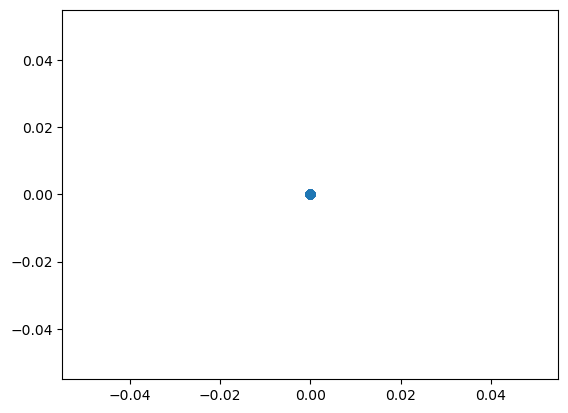

In [23]:
# TODO This is wrong, something wrong with nudges 

plt.figure()
unit = 6
dw_dend_tc_H2_0 = dend_temp_contrast_net.weights['H2'].data[unit] - dend_temp_contrast_net.initial_weights['H2'].data[unit]
dw_bp_H2_0 = bp_net.weights['H2'].data[unit] - bp_net.initial_weights['H2'].data[unit]
plt.scatter(dw_bp_H2_0, dw_dend_tc_H2_0)

# model = np.polyfit(dw_bp_H2_0, dw_dend_tc_H2_0, 1)
# slope = model[0]
# intercept = model[1]
# plt.plot(dw_bp_H2_0, slope * dw_bp_H2_0 + intercept, color='red')
# print(slope)

plt.show()

In [24]:
print(dend_temp_contrast_net.weights['H2'].data[6])
print(dend_temp_contrast_net.initial_weights['H2'].data[6])

tensor([ 0.0487,  0.0274, -0.0481, -0.0705,  0.0831, -0.0638, -0.0458,  0.0080,
        -0.0059,  0.0183,  0.0531, -0.0679,  0.0031, -0.0520,  0.0158,  0.0589,
        -0.0582, -0.0091,  0.0317, -0.0378, -0.0772,  0.0798, -0.0089,  0.0631,
        -0.0653, -0.0530,  0.0816,  0.0026, -0.0120,  0.0376, -0.0775, -0.0344,
        -0.0629, -0.0549, -0.0556, -0.0191,  0.0235,  0.0778,  0.0748, -0.0195,
        -0.0206,  0.0169,  0.0881, -0.0861, -0.0659, -0.0531,  0.0487, -0.0150,
         0.0361, -0.0002, -0.0823, -0.0574, -0.0598,  0.0090,  0.0301, -0.0372,
         0.0728, -0.0431, -0.0734,  0.0149,  0.0520,  0.0457, -0.0442,  0.0667,
         0.0093,  0.0576, -0.0105, -0.0341, -0.0735,  0.0669,  0.0330,  0.0463,
        -0.0350,  0.0415,  0.0674,  0.0312,  0.0092, -0.0858,  0.0331, -0.0056,
         0.0706, -0.0516,  0.0565,  0.0418, -0.0513, -0.0280,  0.0439,  0.0825,
         0.0494, -0.0634, -0.0813,  0.0175, -0.0778,  0.0598,  0.0227, -0.0106,
         0.0496,  0.0216,  0.0050, -0.02

In [25]:
print(bp_net.weights['H2'].data[6])
print(bp_net.initial_weights['H2'].data[6])

tensor([ 0.0487,  0.0274, -0.0481, -0.0705,  0.0831, -0.0638, -0.0458,  0.0080,
        -0.0059,  0.0183,  0.0531, -0.0679,  0.0031, -0.0520,  0.0158,  0.0589,
        -0.0582, -0.0091,  0.0317, -0.0378, -0.0772,  0.0798, -0.0089,  0.0631,
        -0.0653, -0.0530,  0.0816,  0.0026, -0.0120,  0.0376, -0.0775, -0.0344,
        -0.0629, -0.0549, -0.0556, -0.0191,  0.0235,  0.0778,  0.0748, -0.0195,
        -0.0206,  0.0169,  0.0881, -0.0861, -0.0659, -0.0531,  0.0487, -0.0150,
         0.0361, -0.0002, -0.0823, -0.0574, -0.0598,  0.0090,  0.0301, -0.0372,
         0.0728, -0.0431, -0.0734,  0.0149,  0.0520,  0.0457, -0.0442,  0.0667,
         0.0093,  0.0576, -0.0105, -0.0341, -0.0735,  0.0669,  0.0330,  0.0463,
        -0.0350,  0.0415,  0.0674,  0.0312,  0.0092, -0.0858,  0.0331, -0.0056,
         0.0706, -0.0516,  0.0565,  0.0418, -0.0513, -0.0280,  0.0439,  0.0825,
         0.0494, -0.0634, -0.0813,  0.0175, -0.0778,  0.0598,  0.0227, -0.0106,
         0.0496,  0.0216,  0.0050, -0.02

In [26]:
dend_temp_contrast_net.weights['H2'].data[6] == bp_net.weights['H2'].data[6]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

In [27]:
dend_temp_contrast_net.weights['H1'].data

tensor([[-4.7172e-01, -6.0755e-01],
        [-4.1042e-01, -2.1666e-01],
        [ 3.0366e-01, -2.0988e-01],
        [-1.3783e-01,  6.8116e-01],
        [ 6.7940e-01,  5.4357e-01],
        [ 1.5712e-01,  5.0859e-01],
        [-4.6469e-01, -6.6941e-01],
        [ 3.6064e-01, -1.0257e-01],
        [-2.6229e-01,  1.2945e-01],
        [ 6.7982e-01, -7.1484e-03],
        [-5.1763e-01, -6.5191e-01],
        [ 2.6555e-01, -6.1454e-01],
        [-3.9084e-01,  1.6145e-01],
        [-1.9176e-01, -2.1184e-01],
        [ 9.7431e-02, -4.6658e-01],
        [-7.1000e-02,  1.8522e-01],
        [ 2.2751e-01, -6.2995e-02],
        [ 2.3208e-01,  6.2740e-01],
        [ 4.6795e-01,  5.8665e-01],
        [-4.0639e-01, -5.9205e-01],
        [ 2.5165e-01,  6.2178e-01],
        [ 4.7841e-01,  5.1622e-01],
        [-6.4666e-01, -5.2844e-01],
        [-4.9014e-01,  2.2915e-01],
        [-6.3294e-01,  3.9964e-01],
        [ 1.6927e-01,  6.1400e-01],
        [-6.0497e-01, -4.3486e-01],
        [-2.8504e-01, -4.019

In [28]:
bp_net.weights['H1'].data

tensor([[-4.7172e-01, -6.0755e-01],
        [-4.1042e-01, -2.1666e-01],
        [ 3.0366e-01, -2.0988e-01],
        [-1.3783e-01,  6.8116e-01],
        [ 6.7940e-01,  5.4357e-01],
        [ 1.5712e-01,  5.0859e-01],
        [-4.6469e-01, -6.6941e-01],
        [ 3.6064e-01, -1.0257e-01],
        [-2.6229e-01,  1.2945e-01],
        [ 6.7982e-01, -7.1484e-03],
        [-5.1763e-01, -6.5191e-01],
        [ 2.6555e-01, -6.1454e-01],
        [-3.9084e-01,  1.6145e-01],
        [-1.9176e-01, -2.1184e-01],
        [ 9.7431e-02, -4.6658e-01],
        [-7.1000e-02,  1.8522e-01],
        [ 2.2751e-01, -6.2995e-02],
        [ 2.3208e-01,  6.2740e-01],
        [ 4.6795e-01,  5.8665e-01],
        [-4.0639e-01, -5.9205e-01],
        [ 2.5165e-01,  6.2178e-01],
        [ 4.7841e-01,  5.1622e-01],
        [-6.4666e-01, -5.2844e-01],
        [-4.9014e-01,  2.2915e-01],
        [-6.3294e-01,  3.9964e-01],
        [ 1.6927e-01,  6.1400e-01],
        [-6.0497e-01, -4.3486e-01],
        [-2.8504e-01, -4.019

In [29]:
dend_temp_contrast_net.weights['H1'].data - bp_net.weights['H1'].data

tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.000

In [30]:
torch.all(dend_temp_contrast_net.ReLU_derivative(dend_temp_contrast_net.forward_soma_state['H2']) == bp_net.ReLU_derivative(bp_net.forward_soma_state['H2']))

tensor(True)

In [31]:
local_loss_H2 = dend_temp_contrast_net.nudges['H2'] * dend_temp_contrast_net.ReLU_derivative(dend_temp_contrast_net.forward_soma_state['H2'])

In [32]:
print(local_loss_H2)
print(dend_temp_contrast_net.forward_activity['H2'])
print(dend_temp_contrast_net.forward_soma_state['H2'])
print(dend_temp_contrast_net.nudges['H2'])

tensor([[-0.0000,  0.0000, -0.0564,  0.0000, -0.0000,  0.0763,  0.0000,  0.0000,
         -0.0000,  0.0326,  0.0000,  0.0000, -0.0000, -0.0650,  0.0179,  0.0196,
          0.0000,  0.0512,  0.0117,  0.0000, -0.0000, -0.0660, -0.0000,  0.0497,
         -0.0000, -0.0000, -0.0365,  0.0000,  0.0000, -0.0601, -0.0835,  0.0000]],
       grad_fn=<MulBackward0>)
tensor([[0.0000, 0.0000, 0.0704, 0.0000, 0.0000, 0.0107, 0.0000, 0.0000, 0.0000,
         0.5660, 0.0000, 0.0000, 0.0000, 0.0970, 0.0665, 0.2365, 0.0000, 0.1217,
         0.0357, 0.0000, 0.0000, 0.5316, 0.0000, 0.1204, 0.0000, 0.0000, 0.3566,
         0.0000, 0.0000, 0.0773, 0.2922, 0.0000]])
tensor([[-0.1694, -0.0674,  0.0704, -0.1244, -0.1971,  0.0107, -0.4012, -0.0939,
         -0.0471,  0.5660, -0.2725, -0.0582, -0.0560,  0.0970,  0.0665,  0.2365,
         -0.2411,  0.1217,  0.0357, -0.1517, -0.0100,  0.5316, -0.3601,  0.1204,
         -0.1623, -0.2318,  0.3566, -0.1553, -0.2527,  0.0773,  0.2922, -0.4071]])
tensor([[-0.0000,  0.00

In [33]:
bp_net.weights['H2'].grad.shape

torch.Size([32, 128])

In [34]:
dend_temp_contrast_net.nudges['H2'].shape

torch.Size([1, 32])

In [35]:
dend_temp_contrast_net.forward_dend_state['H2']

tensor([[-0.0044,  0.0069, -0.0057,  0.0069, -0.0007,  0.0084,  0.0052,  0.0063,
         -0.0015,  0.0041,  0.0069,  0.0047, -0.0069, -0.0077,  0.0015,  0.0019,
          0.0003,  0.0052,  0.0006,  0.0025, -0.0056, -0.0074, -0.0016,  0.0057,
         -0.0030, -0.0050, -0.0043,  0.0029,  0.0064, -0.0066, -0.0087, -0.0005]],
       grad_fn=<MmBackward0>)

In [36]:
plt.figure()
# plt.scatter(dw_bp_H1.flatten(), bp_net.mlp[-4].weight.grad.flatten())

# model = np.polyfit(dw_bp_H2, bp_net.mlp[-4].weight.grad.flatten(), 1)
# slope = model[0]
# intercept = model[1]
# plt.plot(dw_bp_H2, slope * dw_bp_H2 + intercept, color='red')
# print(slope)

plt.show()

<Figure size 640x480 with 0 Axes>

In [37]:
torch.set_printoptions(precision=30)
print(dend_temp_contrast_net.weights['H1'][0][0])
print(dend_temp_contrast_net.forward_activity['H1'][0][0])
print(dend_temp_contrast_net.backward_activity['H1'][0][0])
print(dend_temp_contrast_net.nudges['H1'][0][0])
print(dend_temp_contrast_net.forward_activity['Input'][0][0])

tensor(-0.471722443455542483903286665736, grad_fn=<SelectBackward0>)
tensor(0.)
tensor(0., grad_fn=<SelectBackward0>)
tensor(0., grad_fn=<SelectBackward0>)
tensor(-0.614288065313801534550464111817)


In [38]:
bp_net.weights['H1'].grad.data[0][0] / bp_net.forward_activity['Input'][0][0]

tensor(0.)

In [39]:
dend_temp_contrast_net.nudges['H1'][0][0] # * dend_temp_contrast_net.forward_activity['Input'][0][0]

tensor(0., grad_fn=<SelectBackward0>)

In [40]:
dw_bp_H1[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
dw_dend_tc_H1[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
torch.all(dend_temp_contrast_net.forward_activity['Input'] == bp_net.forward_activity['Input'])

tensor(True)

In [43]:
bp_net.forward_activity['Input'][0][0]

tensor(-0.614288065313801534550464111817)

In [44]:
dw_bp_H1 - dw_dend_tc_H1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [45]:
bp_net.hooked_grads['H1']

tensor([[ 0.000000000000000000000000000000, -0.000253405057636208255744669771,
         -0.001066877163524605461389360705,  0.012272986758249945088428134454,
         -0.001555485956201354972097683493, -0.016247913312044968969782843260,
          0.010100704599979628758865679572,  0.000000000000000000000000000000,
         -0.020241074721954372545029698927,  0.000000000000000000000000000000,
         -0.007798496882227441522050792599,  0.014787214129906975715322836606,
          0.007081167318704196904366465759, -0.004854683768939480927040452940,
          0.000000000000000000000000000000,  0.015627889089330708471958786276,
          0.000000000000000000000000000000, -0.004949468908843540626563139995,
          0.016545459839507194871321971164,  0.000000000000000000000000000000,
         -0.002759230726707418302617869088,  0.000000000000000000000000000000,
          0.003248601031800100145952026054,  0.006158620186646720714995772994,
         -0.010694214953728917519293339922,  0.00000

In [46]:
dend_temp_contrast_net.nudges['H1']

tensor([[ 0.000000000000000000000000000000,  0.000253405057636213459915097701,
          0.001066877163524604377187188220, -0.012272986758249934680087278593,
          0.001555485956201349551086821066,  0.016247913312044968969782843260,
         -0.010100704599979637432483059456,  0.000000000000000000000000000000,
          0.020241074721954372545029698927, -0.000000000000000000000000000000,
          0.007798496882227442389412530588, -0.014787214129906973980599360630,
         -0.007081167318704187363387347887,  0.004854683768939480059678714952,
         -0.000000000000000000000000000000, -0.015627889089330705002511834323,
         -0.000000000000000000000000000000,  0.004949468908843540626563139995,
         -0.016545459839507177524087211395,  0.000000000000000000000000000000,
          0.002759230726707407460596144233, -0.000000000000000000000000000000,
         -0.003248601031800107952207667950, -0.006158620186646743266400960692,
          0.010694214953728908845675960038,  0.00000

In [48]:
bp_net.hooked_grads['H1'] + dend_temp_contrast_net.nudges['H1']

tensor([[ 0.000000000000000000000000000000e+00,
          5.204170427930421283235773444176e-18,
         -1.084202172485504434007452800870e-18,
          1.040834085586084256647154688835e-17,
         -5.421010862427522170037264004350e-18,
          0.000000000000000000000000000000e+00,
         -8.673617379884035472059622406960e-18,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          8.673617379884035472059622406960e-19,
          1.734723475976807094411924481392e-18,
          9.540979117872439019265584647655e-18,
         -8.673617379884035472059622406960e-19,
          0.000000000000000000000000000000e+00,
          3.469446951953614188823848962784e-18,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          1.734723475976807094411924481392e-17,
          0.000000000000000000000000000000e+00,
         -1.0842021724855044340074528008

In [49]:
bp_net.hooked_grads['H2'] + dend_temp_contrast_net.nudges['H2']

tensor([[ 0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
         -6.938893903907228377647697925568e-18,
          0.000000000000000000000000000000e+00,
          0.000000000000000000000000000000e+00,
          0.0000000000000000000000000000

In [50]:
bp_net.hooked_grads['Out'] + dend_temp_contrast_net.nudges['Out']

tensor([[0., 0., 0., 0.]])

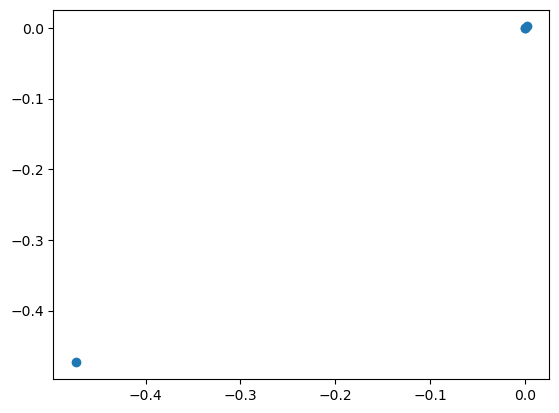

In [64]:
plt.figure()
plt.scatter(bp_net.hooked_grads['Out'].detach().numpy().flatten(), -dend_temp_contrast_net.nudges['Out'].detach().numpy().flatten())
plt.show()

In [62]:
bp_net.hooked_grads['H1'] == -dend_temp_contrast_net.nudges['H1'].type(torch.float32)

tensor([[ True, False, False, False, False, False, False,  True, False,  True,
         False, False, False, False,  True, False,  True, False, False,  True,
         False,  True, False, False, False,  True,  True,  True,  True,  True,
         False,  True, False, False, False,  True, False, False,  True, False,
         False, False,  True,  True, False, False, False, False,  True,  True,
         False, False, False,  True,  True,  True, False,  True, False,  True,
         False, False,  True,  True, False, False,  True,  True, False, False,
         False, False, False, False, False, False,  True, False,  True,  True,
          True, False, False,  True,  True, False,  True, False, False, False,
         False, False,  True,  True,  True,  True,  True,  True,  True,  True,
          True, False,  True,  True,  True,  True, False, False, False,  True,
          True,  True,  True, False,  True,  True,  True, False,  True, False,
         False,  True, False,  True, False,  True,  

In [51]:
dend_temp_contrast_net.nudges['Out']

tensor([[ 0.000000000000000000000000000000, -0.002035034849871879270022390074,
          0.473347615922387665587933724964,  0.000000000000000000000000000000]])

In [52]:
bp_net.forward_activity['Out']

tensor([[0.000000000000000000000000000000, 0.004070069699743758540044780148,
         0.053304768155224641068556934442, 0.000000000000000000000000000000]])

In [53]:
bp_net.forward_activity['Input']

tensor([[-0.614288065313801534550464111817,  0.202294801025929116278234687343]])

In [54]:
scalar = torch.tensor(2.0) / torch.tensor(4.0)
scalar

tensor(0.500000000000000000000000000000)

In [55]:
print(scalar.item())

0.5
